In [710]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as SM
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

In [711]:
scm=pd.read_csv('F:\PGP_DSBA\CAPSTONE\product_shipment.csv')
scm.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [712]:
#scm["num_refill_req_l3m"]=pd.Categorical(scm.num_refill_req_l3m)
#scm["transport_issue_l1y"]=pd.Categorical(scm.transport_issue_l1y)
#scm["Competitor_in_mkt"]=pd.Categorical(scm.Competitor_in_mkt)
scm["flood_impacted"]=pd.Categorical(scm.flood_impacted)
scm["flood_proof"]=pd.Categorical(scm.flood_proof)
#scm["temp_reg_mach"]=pd.Categorical(scm.temp_reg_mach)
scm["electric_supply"]=pd.Categorical(scm.electric_supply)
#scm["wh_breakdown_l3m"]=pd.Categorical(scm.wh_breakdown_l3m)

In [713]:
scm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Ware_house_ID                 25000 non-null  object  
 1   WH_Manager_ID                 25000 non-null  object  
 2   Location_type                 25000 non-null  object  
 3   WH_capacity_size              25000 non-null  object  
 4   zone                          25000 non-null  object  
 5   WH_regional_zone              25000 non-null  object  
 6   num_refill_req_l3m            25000 non-null  int64   
 7   transport_issue_l1y           25000 non-null  int64   
 8   Competitor_in_mkt             25000 non-null  int64   
 9   retail_shop_num               25000 non-null  int64   
 10  wh_owner_type                 25000 non-null  object  
 11  distributor_num               25000 non-null  int64   
 12  flood_impacted                25000 non-null  

In [714]:
scm.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [715]:
scm.drop('wh_est_year',axis=1,inplace=True)
scm

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,1,91,29.0,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,0,1,210,31.0,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,0,161,37.0,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,0,103,21.0,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,0,1,112,25.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,WH_124995,EID_74995,Rural,Small,North,Zone 1,3,0,4,5390,...,0,1,142,34.0,22,1,A,2,30,32093
24996,WH_124996,EID_74996,Rural,Mid,West,Zone 2,6,0,4,4490,...,0,1,130,28.0,10,0,B,4,18,12114
24997,WH_124997,EID_74997,Urban,Large,South,Zone 5,7,0,2,5403,...,0,1,147,NaN,23,0,B+,5,25,27080
24998,WH_124998,EID_74998,Rural,Small,North,Zone 1,1,0,2,10562,...,0,1,60,25.0,18,0,A,6,30,25093


In [716]:
scm['workers_num'].fillna(scm.workers_num.median(),inplace=True)
scm['approved_wh_govt_certificate'].fillna(scm.approved_wh_govt_certificate.mode,inplace=True)

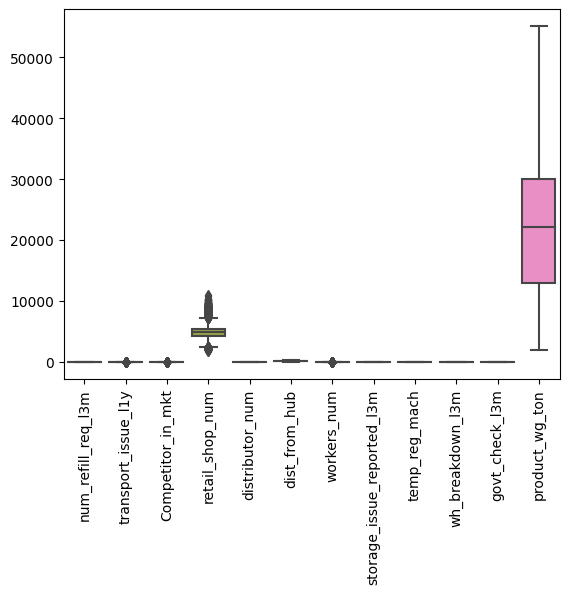

In [717]:
sns.boxplot(scm)
plt.xticks(rotation=90);

In [718]:
def remove_outlier(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [719]:
lr,ur=remove_outlier(scm['retail_shop_num'])
scm['retail_shop_num']=np.where(scm['retail_shop_num']>ur,ur,scm['retail_shop_num'])
scm['retail_shop_num']=np.where(scm['retail_shop_num']<lr,lr,scm['retail_shop_num'])

In [720]:
lr,ur=remove_outlier(scm['workers_num'])
scm['workers_num']=np.where(scm['workers_num']>ur,ur,scm['workers_num'])
scm['workers_num']=np.where(scm['workers_num']<lr,lr,scm['workers_num'])

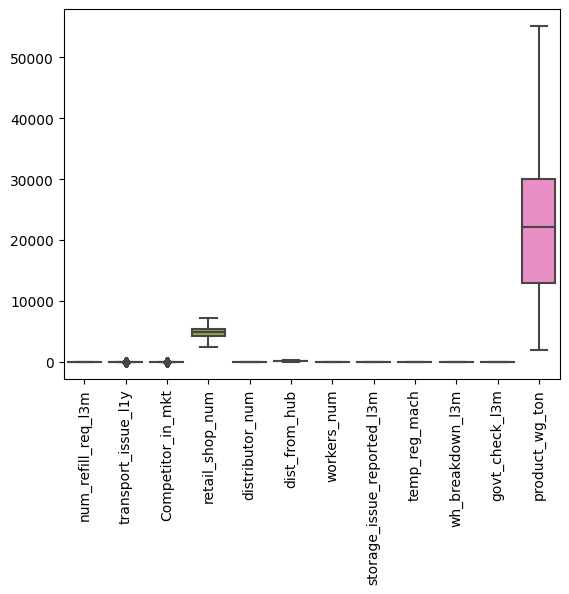

In [721]:
sns.boxplot(scm)
plt.xticks(rotation=90);

In [722]:
scm['Location_type_urban']=scm['Location_type'].replace({'Urban':1,'Rural':0})
scm['WH_capacity_size_UDF']=scm['WH_capacity_size'].replace({'Large':3,'Mid':2,'Small':1})
scm['zone_UDF']=scm['zone'].replace({'East':1,'West':2,'North':3,'South':4})
scm['WH_regional_zone_UDF']=scm['WH_regional_zone'].replace({'Zone 1':1,'Zone 2':2,'Zone 3':3,'Zone 4':4,'Zone 5':5,'Zone 6':6})
scm['wh_owner_type_rented']=scm['wh_owner_type'].replace({'Company Owned':0,'Rented':1})
scm['approved_wh_govt_certificate_UDF']=scm['approved_wh_govt_certificate'].replace({"<bound method Series.mode of 0     1         A2         A3        A+4         C       ..24995     24996     24997    B+24998     A24999    B+Name: approved_wh_govt_certificate, Length: 25000, dtype: object>":0,'A+':1,'A':2,'B+':3,'B':4,'C':5})

In [723]:
scm.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Location_type_urban,WH_capacity_size_UDF,zone_UDF,WH_regional_zone_UDF,wh_owner_type_rented,approved_wh_govt_certificate_UDF
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651.0,...,A,5,15,17115,1,1,2,6,1,2
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217.0,...,A,3,17,5074,0,3,3,5,0,2
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306.0,...,A,6,22,23137,0,2,4,2,0,2
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000.0,...,A+,3,27,22115,0,2,3,3,1,1
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740.0,...,C,6,24,24071,0,3,3,5,0,5


# CLUSTERING :

In [724]:
result = scm.select_dtypes(include='number')
result

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Location_type_urban,WH_capacity_size_UDF,zone_UDF,WH_regional_zone_UDF,wh_owner_type_rented
0,3,1,2,4651.0,24,91,29.0,13,0,5,15,17115,1,1,2,6,1
1,0,0,4,6217.0,47,210,31.0,4,0,3,17,5074,0,3,3,5,0
2,1,0,4,4306.0,64,161,37.0,17,0,6,22,23137,0,2,4,2,0
3,7,4,2,6000.0,50,103,21.0,17,1,3,27,22115,0,2,3,3,1
4,3,1,2,4740.0,42,112,25.0,18,0,6,24,24071,0,3,3,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3,0,4,5390.0,19,142,34.0,22,1,2,30,32093,0,1,3,1,1
24996,6,0,4,4490.0,57,130,28.0,10,0,4,18,12114,0,2,2,2,0
24997,7,0,2,5403.0,31,147,28.0,23,0,5,25,27080,1,3,4,5,1
24998,1,0,2,7280.5,25,60,25.0,18,0,6,30,25093,0,1,3,1,1


In [725]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
X = StandardScaler()
scaled_scm= X.fit_transform(result)

In [726]:
wss =[] 

In [727]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_scm)
    wss.append(KM.inertia_)

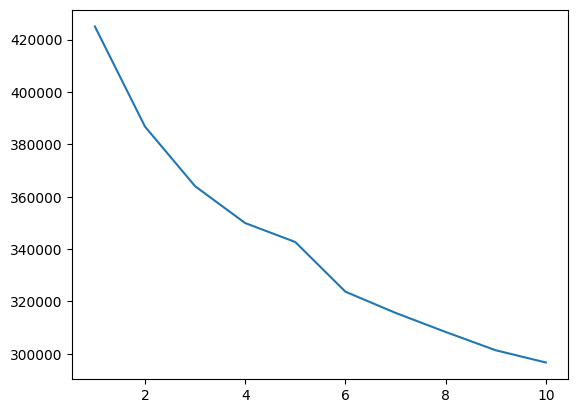

In [728]:
plt.plot(range(1,11), wss)

In [729]:
k_means = KMeans(n_clusters = 7)
k_means.fit(scaled_scm)
labels= k_means.labels_

In [730]:
scm["Demand_labels"] = labels
scm.head(5)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Location_type_urban,WH_capacity_size_UDF,zone_UDF,WH_regional_zone_UDF,wh_owner_type_rented,approved_wh_govt_certificate_UDF,Demand_labels
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651.0,...,5,15,17115,1,1,2,6,1,2,6
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217.0,...,3,17,5074,0,3,3,5,0,2,3
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306.0,...,6,22,23137,0,2,4,2,0,2,4
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000.0,...,3,27,22115,0,2,3,3,1,1,5
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740.0,...,6,24,24071,0,3,3,5,0,5,2


In [731]:
scm_1=pd.DataFrame(scm.groupby(['Demand_labels'])['product_wg_ton'].median().round(2))
scm_1.rename(columns={"product_wg_ton": "Qty_needed"}, inplace=True)
scm_1


,Qty_needed
Demand_labels,
0,22093.0
1,30092.0
2,30095.0
3,7146.0
4,21114.0
5,17061.0
6,25076.0


In [792]:
#scm.to_csv('F:cap_final_scm_dataset.csv')

# MODEL BUILDING :

In [733]:
wh=pd.DataFrame( scm.select_dtypes(include='number'))
wh.dtypes

num_refill_req_l3m              int64
transport_issue_l1y             int64
Competitor_in_mkt               int64
retail_shop_num               float64
distributor_num                 int64
dist_from_hub                   int64
workers_num                   float64
storage_issue_reported_l3m      int64
temp_reg_mach                   int64
wh_breakdown_l3m                int64
govt_check_l3m                  int64
product_wg_ton                  int64
Location_type_urban             int64
WH_capacity_size_UDF            int64
zone_UDF                        int64
WH_regional_zone_UDF            int64
wh_owner_type_rented            int64
Demand_labels                   int32
dtype: object

In [734]:
scm.dtypes

Ware_house_ID                         object
WH_Manager_ID                         object
Location_type                         object
WH_capacity_size                      object
zone                                  object
WH_regional_zone                      object
num_refill_req_l3m                     int64
transport_issue_l1y                    int64
Competitor_in_mkt                      int64
retail_shop_num                      float64
wh_owner_type                         object
distributor_num                        int64
flood_impacted                      category
flood_proof                         category
electric_supply                     category
dist_from_hub                          int64
workers_num                          float64
storage_issue_reported_l3m             int64
temp_reg_mach                          int64
approved_wh_govt_certificate          object
wh_breakdown_l3m                       int64
govt_check_l3m                         int64
product_wg

In [735]:
wh.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Location_type_urban,WH_capacity_size_UDF,zone_UDF,WH_regional_zone_UDF,wh_owner_type_rented,Demand_labels
0,3,1,2,4651.0,24,91,29.0,13,0,5,15,17115,1,1,2,6,1,6
1,0,0,4,6217.0,47,210,31.0,4,0,3,17,5074,0,3,3,5,0,3
2,1,0,4,4306.0,64,161,37.0,17,0,6,22,23137,0,2,4,2,0,4
3,7,4,2,6000.0,50,103,21.0,17,1,3,27,22115,0,2,3,3,1,5
4,3,1,2,4740.0,42,112,25.0,18,0,6,24,24071,0,3,3,5,0,2


In [736]:
x=wh.drop('Demand_labels',axis=1)
y=wh['Demand_labels']

In [737]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = .30 ,random_state = 0)

In [738]:
x.corr()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Location_type_urban,WH_capacity_size_UDF,zone_UDF,WH_regional_zone_UDF,wh_owner_type_rented
num_refill_req_l3m,1.000000,0.018549,0.002985,-0.002754,0.003995,0.000048,-0.013322,-0.006602,0.260928,0.000608,-0.003302,0.001415,0.016419,0.007054,-0.007359,0.007988,0.010474
transport_issue_l1y,0.018549,1.000000,-0.005826,-0.002559,0.008993,0.014336,-0.007199,-0.144327,0.018207,0.012990,0.002190,-0.173992,0.009298,-0.011046,0.003389,-0.001561,0.003617
Competitor_in_mkt,0.002985,-0.005826,1.000000,-0.164712,-0.001492,0.008407,0.000328,0.009543,0.009524,0.012733,-0.043455,0.008884,0.011143,-0.014475,-0.426902,0.030642,-0.006413
retail_shop_num,-0.002754,-0.002559,-0.164712,1.000000,-0.000473,0.000837,-0.005185,-0.007224,-0.001484,-0.009073,0.048388,-0.007267,-0.001235,-0.069179,0.056183,-0.022171,0.008533
distributor_num,0.003995,0.008993,-0.001492,-0.000473,1.000000,-0.011838,-0.012208,0.003396,0.002827,0.004286,-0.007934,0.004999,-0.002565,0.001268,-0.003778,0.000653,0.005745
dist_from_hub,0.000048,0.014336,0.008407,0.000837,-0.011838,1.000000,-0.017156,-0.005726,0.000902,-0.000906,-0.000531,-0.005017,-0.005915,0.001837,0.001102,0.004838,-0.001972
workers_num,-0.013322,-0.007199,0.000328,-0.005185,-0.012208,-0.017156,1.000000,-0.008926,-0.000678,-0.015411,-0.003857,-0.008806,-0.002356,0.000797,-0.007605,0.008360,-0.196225
storage_issue_reported_l3m,-0.006602,-0.144327,0.009543,-0.007224,0.003396,-0.005726,-0.008926,1.000000,0.067309,0.376986,-0.007602,0.986777,0.078621,0.005454,-0.006527,0.001415,0.005918
temp_reg_mach,0.260928,0.018207,0.009524,-0.001484,0.002827,0.000902,-0.000678,0.067309,1.000000,0.059160,0.003944,0.101638,0.022363,0.001056,-0.006019,-0.005500,0.001212
wh_breakdown_l3m,0.000608,0.012990,0.012733,-0.009073,0.004286,-0.000906,-0.015411,0.376986,0.059160,1.000000,-0.013273,0.342685,0.047270,0.000357,-0.011741,-0.002127,0.013593


In [739]:
#sns.heatmap(x)

# DECISION TREE :

In [740]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=0)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [741]:
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

1.0
0.9018666666666667


In [742]:
from sklearn import tree
train_char_label = ['0', '1','2','3','4','5','6']
wh_dt_File = open('wh_dt.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=wh_dt_File, feature_names = list(x_train), class_names = list(train_char_label))
wh_dt_File.close()

In [743]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, random_state=0)
dTreeR.fit(x_train, y_train)
print(dTreeR.score(x_train, y_train))
print(dTreeR.score(x_test, y_test))

0.8472
0.8464


In [744]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = x_train.columns))

                                 Imp
num_refill_req_l3m          0.000085
transport_issue_l1y         0.175028
Competitor_in_mkt           0.070781
retail_shop_num             0.000319
distributor_num             0.000000
dist_from_hub               0.000284
workers_num                 0.000000
storage_issue_reported_l3m  0.017946
temp_reg_mach               0.167142
wh_breakdown_l3m            0.035379
govt_check_l3m              0.022506
product_wg_ton              0.167845
Location_type_urban         0.137562
WH_capacity_size_UDF        0.000000
zone_UDF                    0.058947
WH_regional_zone_UDF        0.146178
wh_owner_type_rented        0.000000


0.8464


<AxesSubplot: xlabel='None'>

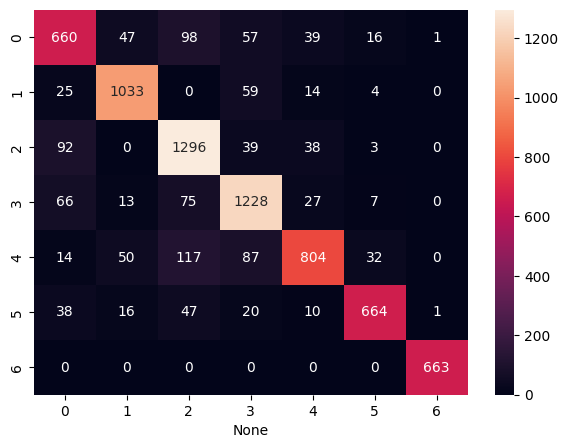

In [745]:
print(dTreeR.score(x_test , y_test))
y_dt_predict = dTreeR.predict(x_test)
y_dt_predict_train = dTreeR.predict(x_train)
cm=metrics.confusion_matrix(y_test, y_dt_predict, labels=[0, 1,2,3,4,5,6])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1",'2','3','4','5','6']],
                  columns = [i for i in [["0","1",'2','3','4','5','6']]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [746]:
print(confusion_matrix(y_train,y_dt_predict_train))
print(classification_report(y_train,y_dt_predict_train))

[[1473  110  276  156  134   20    0]
 [  61 2396    0  110   26   13    0]
 [ 232    0 3038   63   73   17    0]
 [ 135   26  180 2914   70   14    0]
 [  34   97  240  202 2000   86    0]
 [  70   32  125   47   25 1634    0]
 [   0    0    0    0    0    0 1371]]
              precision    recall  f1-score   support

           0       0.73      0.68      0.71      2169
           1       0.90      0.92      0.91      2606
           2       0.79      0.89      0.83      3423
           3       0.83      0.87      0.85      3339
           4       0.86      0.75      0.80      2659
           5       0.92      0.85      0.88      1933
           6       1.00      1.00      1.00      1371

    accuracy                           0.85     17500
   macro avg       0.86      0.85      0.85     17500
weighted avg       0.85      0.85      0.85     17500



In [747]:
print(confusion_matrix(y_test,y_dt_predict))
print(classification_report(y_test,y_dt_predict))

[[ 660   47   98   57   39   16    1]
 [  25 1033    0   59   14    4    0]
 [  92    0 1296   39   38    3    0]
 [  66   13   75 1228   27    7    0]
 [  14   50  117   87  804   32    0]
 [  38   16   47   20   10  664    1]
 [   0    0    0    0    0    0  663]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       918
           1       0.89      0.91      0.90      1135
           2       0.79      0.88      0.84      1468
           3       0.82      0.87      0.85      1416
           4       0.86      0.73      0.79      1104
           5       0.91      0.83      0.87       796
           6       1.00      1.00      1.00       663

    accuracy                           0.85      7500
   macro avg       0.86      0.85      0.85      7500
weighted avg       0.85      0.85      0.85      7500



In [748]:
pred_1 = dTreeR.predict_proba(x_train)
roc_auc_1 = roc_auc_score(y_train,pred_1, multi_class='ovr')
print('ROC-AUC SCORE FOR TRAIN:',roc_auc_1)
plt.show()

ROC-AUC SCORE FOR TRAIN: 0.9708318196049958


In [749]:
pred_test_1 = dTreeR.predict_proba(x_test)
roc_auc_test_1 = roc_auc_score(y_test,pred_test_1, multi_class='ovr')
print('ROC-AUC SCORE FOR Test:',roc_auc_test_1)
plt.show()

ROC-AUC SCORE FOR Test: 0.9694609072078721


# SVM :

In [750]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train)
x_train = scaling.transform(x_train)
x_test = scaling.transform(x_test)

In [751]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [752]:
print(classifier.score(x_train, y_train))
print(classifier.score(x_test, y_test))

0.9878285714285714
0.9825333333333334


In [753]:
y_predict_train = classifier.predict(x_train)

0.9825333333333334


<AxesSubplot: xlabel='None'>

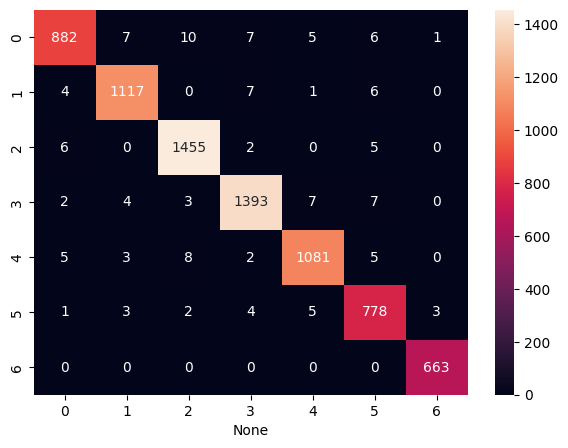

In [754]:
print(classifier.score(x_test , y_test))
y_predict = classifier.predict(x_test)

cm_svc=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1,2,3,4,5,6])

df_cm_svc= pd.DataFrame(cm_svc, index = [i for i in ["0","1",'2','3','4','5','6']],
                  columns = [i for i in [["0","1",'2','3','4','5','6']]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_svc, annot=True ,fmt='g')

In [755]:
print(confusion_matrix(y_train,y_predict_train))
print(classification_report(y_train,y_predict_train))

[[2101   12   19   15    9    9    4]
 [   7 2582    0    7    7    3    0]
 [  17    0 3385    8    5    8    0]
 [   5    2   16 3299   10    7    0]
 [   9    5    9    2 2631    3    0]
 [   1    6    2    0    5 1918    1]
 [   0    0    0    0    0    0 1371]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2169
           1       0.99      0.99      0.99      2606
           2       0.99      0.99      0.99      3423
           3       0.99      0.99      0.99      3339
           4       0.99      0.99      0.99      2659
           5       0.98      0.99      0.99      1933
           6       1.00      1.00      1.00      1371

    accuracy                           0.99     17500
   macro avg       0.99      0.99      0.99     17500
weighted avg       0.99      0.99      0.99     17500



In [756]:
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[ 882    7   10    7    5    6    1]
 [   4 1117    0    7    1    6    0]
 [   6    0 1455    2    0    5    0]
 [   2    4    3 1393    7    7    0]
 [   5    3    8    2 1081    5    0]
 [   1    3    2    4    5  778    3]
 [   0    0    0    0    0    0  663]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       918
           1       0.99      0.98      0.98      1135
           2       0.98      0.99      0.99      1468
           3       0.98      0.98      0.98      1416
           4       0.98      0.98      0.98      1104
           5       0.96      0.98      0.97       796
           6       0.99      1.00      1.00       663

    accuracy                           0.98      7500
   macro avg       0.98      0.98      0.98      7500
weighted avg       0.98      0.98      0.98      7500



# KNN :

In [757]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train) 

In [758]:
print(knn.score(x_train, y_train))
print(knn.score(x_test, y_test))

0.8918285714285714
0.8528


In [759]:
y_knn_predict =knn.predict(x_test)
y_knn_predict_train = knn.predict(x_train)   

In [760]:
print(confusion_matrix(y_train,y_knn_predict_train))
print(classification_report(y_train,y_knn_predict_train))

[[1575  141  210  100  109   30    4]
 [  14 2533    0   16   32   11    0]
 [ 177    0 3132   17   85   12    0]
 [  69   68  104 3025   62   11    0]
 [  32   61   74   59 2423   10    0]
 [  50   77   59  120   78 1548    1]
 [   0    0    0    0    0    0 1371]]
              precision    recall  f1-score   support

           0       0.82      0.73      0.77      2169
           1       0.88      0.97      0.92      2606
           2       0.88      0.91      0.89      3423
           3       0.91      0.91      0.91      3339
           4       0.87      0.91      0.89      2659
           5       0.95      0.80      0.87      1933
           6       1.00      1.00      1.00      1371

    accuracy                           0.89     17500
   macro avg       0.90      0.89      0.89     17500
weighted avg       0.89      0.89      0.89     17500



In [761]:
print(confusion_matrix(y_test,y_knn_predict))
print(classification_report(y_test,y_knn_predict))

[[ 587   70  128   66   49   17    1]
 [  13 1097    0    9    9    7    0]
 [  93    0 1313   18   37    7    0]
 [  51   38   61 1225   28   13    0]
 [  19   41   48   40  945   11    0]
 [  36   47   43   69   32  566    3]
 [   0    0    0    0    0    0  663]]
              precision    recall  f1-score   support

           0       0.73      0.64      0.68       918
           1       0.85      0.97      0.90      1135
           2       0.82      0.89      0.86      1468
           3       0.86      0.87      0.86      1416
           4       0.86      0.86      0.86      1104
           5       0.91      0.71      0.80       796
           6       0.99      1.00      1.00       663

    accuracy                           0.85      7500
   macro avg       0.86      0.85      0.85      7500
weighted avg       0.85      0.85      0.85      7500



In [762]:
pred_3 = knn.predict_proba(x_train)
roc_auc_3 = roc_auc_score(y_train,pred_3, multi_class='ovr')
print('ROC-AUC SCORE FOR TRAIN:',roc_auc_3)
plt.show()

ROC-AUC SCORE FOR TRAIN: 0.992233716668591


In [763]:
pred_test_3 = knn.predict_proba(x_test)
roc_auc_test_3 = roc_auc_score(y_test,pred_test_3, multi_class='ovr')
print('ROC-AUC SCORE FOR Test:',roc_auc_test_3)
plt.show()

ROC-AUC SCORE FOR Test: 0.9788979685106006


# NAIVE BAYES :

In [764]:
gnb = GaussianNB()
gnb.fit(x_train, y_train) 

GaussianNB()

In [765]:
y_gnb_predict =gnb.predict(x_test)
y_gnb_predict_train = gnb.predict(x_train) 

In [766]:
print(confusion_matrix(y_train,y_gnb_predict_train))
print(classification_report(y_train,y_gnb_predict_train))

[[  21  354 1697   79   11    3    4]
 [   0 2606    0    0    0    0    0]
 [   0    0 3423    0    0    0    0]
 [   0  689 1278 1366    6    0    0]
 [   0  538 1679   44  398    0    0]
 [   0  590  733  136  140  333    1]
 [   0    0    0    0    0    0 1371]]
              precision    recall  f1-score   support

           0       1.00      0.01      0.02      2169
           1       0.55      1.00      0.71      2606
           2       0.39      1.00      0.56      3423
           3       0.84      0.41      0.55      3339
           4       0.72      0.15      0.25      2659
           5       0.99      0.17      0.29      1933
           6       1.00      1.00      1.00      1371

    accuracy                           0.54     17500
   macro avg       0.78      0.53      0.48     17500
weighted avg       0.74      0.54      0.47     17500



In [767]:
print(confusion_matrix(y_test,y_gnb_predict))
print(classification_report(y_test,y_gnb_predict))

[[  14  143  715   41    3    1    1]
 [   0 1135    0    0    0    0    0]
 [   0    0 1468    0    0    0    0]
 [   0  308  543  564    1    0    0]
 [   0  221  705   19  159    0    0]
 [   0  241  270   59   53  170    3]
 [   0    0    0    0    0    0  663]]
              precision    recall  f1-score   support

           0       1.00      0.02      0.03       918
           1       0.55      1.00      0.71      1135
           2       0.40      1.00      0.57      1468
           3       0.83      0.40      0.54      1416
           4       0.74      0.14      0.24      1104
           5       0.99      0.21      0.35       796
           6       0.99      1.00      1.00       663

    accuracy                           0.56      7500
   macro avg       0.79      0.54      0.49      7500
weighted avg       0.74      0.56      0.49      7500



In [768]:
y_gnb_predict_df=pd.DataFrame(y_gnb_predict)
y_gnb_predict_df

,0
0,2
1,1
2,1
3,6
4,3
...,...
7495,2
7496,2
7497,2
7498,2


In [769]:
y_gnb_predict_df.value_counts()

2    3701
1    2048
3     683
6     667
4     216
5     171
0      14
dtype: int64

In [770]:
pred_4 = gnb.predict_proba(x_train)
roc_auc_4 = roc_auc_score(y_train,pred_4, multi_class='ovr')
print('ROC-AUC SCORE FOR TRAIN:',roc_auc_4)
plt.show()

ROC-AUC SCORE FOR TRAIN: 0.9609613010552591


In [771]:
pred_test_4 = gnb.predict_proba(x_test)
roc_auc_test_4 = roc_auc_score(y_test,pred_test_4, multi_class='ovr')
print('ROC-AUC SCORE FOR Test:',roc_auc_test_4)
plt.show()

ROC-AUC SCORE FOR Test: 0.9610786949372148


# RANDOM FOREST :

In [772]:
rfcl=RandomForestClassifier(random_state=0)
rfcl.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [773]:
y_rfcl_predict =rfcl.predict(x_test)
y_rfcl_predict_train = rfcl.predict(x_train)

In [774]:
print(confusion_matrix(y_train,y_rfcl_predict_train))
print(classification_report(y_train,y_rfcl_predict_train))

[[2169    0    0    0    0    0    0]
 [   0 2606    0    0    0    0    0]
 [   0    0 3423    0    0    0    0]
 [   0    0    0 3339    0    0    0]
 [   0    0    0    0 2659    0    0]
 [   0    0    0    0    0 1933    0]
 [   0    0    0    0    0    0 1371]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2169
           1       1.00      1.00      1.00      2606
           2       1.00      1.00      1.00      3423
           3       1.00      1.00      1.00      3339
           4       1.00      1.00      1.00      2659
           5       1.00      1.00      1.00      1933
           6       1.00      1.00      1.00      1371

    accuracy                           1.00     17500
   macro avg       1.00      1.00      1.00     17500
weighted avg       1.00      1.00      1.00     17500



In [775]:
print(confusion_matrix(y_test,y_rfcl_predict))
print(classification_report(y_test,y_rfcl_predict))

[[ 795   20   26   42   13   21    1]
 [   8 1097    0   13    8    9    0]
 [  22    0 1412    7   20    7    0]
 [  13   10   20 1354   13    6    0]
 [  11   16   28   16 1025    8    0]
 [  11    5   12    8   10  747    3]
 [   0    0    0    0    0    0  663]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       918
           1       0.96      0.97      0.96      1135
           2       0.94      0.96      0.95      1468
           3       0.94      0.96      0.95      1416
           4       0.94      0.93      0.93      1104
           5       0.94      0.94      0.94       796
           6       0.99      1.00      1.00       663

    accuracy                           0.95      7500
   macro avg       0.95      0.95      0.95      7500
weighted avg       0.95      0.95      0.95      7500



In [776]:
pred_5 = rfcl.predict_proba(x_train)
roc_auc_5 = roc_auc_score(y_train,pred_5, multi_class='ovr')
print('ROC-AUC SCORE FOR TRAIN:',roc_auc_5)
plt.show()

ROC-AUC SCORE FOR TRAIN: 1.0


In [777]:
pred_test_5 = rfcl.predict_proba(x_test)
roc_auc_test_5 = roc_auc_score(y_test,pred_test_5, multi_class='ovr')
print('ROC-AUC SCORE FOR Test:',roc_auc_test_5)
plt.show()

ROC-AUC SCORE FOR Test: 0.997831071803252


# ENSEMBLE TECHNIQUE : BAGGING

In [778]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=0)
bgcl.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0),
                  n_estimators=50, random_state=0)

In [779]:
y_bgcl_predict = bgcl.predict(x_test)

print(bgcl.score(x_test , y_test))

0.9394666666666667


In [780]:
y_bgcl_predict_train = bgcl.predict(x_train)

In [781]:
print(confusion_matrix(y_train,y_bgcl_predict_train))
print(classification_report(y_train,y_bgcl_predict_train))

[[2168    0    1    0    0    0    0]
 [   0 2606    0    0    0    0    0]
 [   0    0 3423    0    0    0    0]
 [   0    0    0 3339    0    0    0]
 [   1    0    0    0 2658    0    0]
 [   0    0    0    0    0 1933    0]
 [   0    0    0    0    0    0 1371]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2169
           1       1.00      1.00      1.00      2606
           2       1.00      1.00      1.00      3423
           3       1.00      1.00      1.00      3339
           4       1.00      1.00      1.00      2659
           5       1.00      1.00      1.00      1933
           6       1.00      1.00      1.00      1371

    accuracy                           1.00     17500
   macro avg       1.00      1.00      1.00     17500
weighted avg       1.00      1.00      1.00     17500



In [782]:
print(confusion_matrix(y_test,y_bgcl_predict))
print(classification_report(y_test,y_bgcl_predict))

[[ 790   26   28   39   13   21    1]
 [   8 1103    0   11   10    3    0]
 [  36    0 1397    6   21    8    0]
 [  23   10   14 1344   20    5    0]
 [  12   24   36   16 1008    8    0]
 [  15    9   10    8   11  741    2]
 [   0    0    0    0    0    0  663]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       918
           1       0.94      0.97      0.96      1135
           2       0.94      0.95      0.95      1468
           3       0.94      0.95      0.95      1416
           4       0.93      0.91      0.92      1104
           5       0.94      0.93      0.94       796
           6       1.00      1.00      1.00       663

    accuracy                           0.94      7500
   macro avg       0.94      0.94      0.94      7500
weighted avg       0.94      0.94      0.94      7500



In [783]:
y_bgcl_predict=pd.DataFrame(y_bgcl_predict)
y_bgcl_predict.value_counts()

2    1485
3    1424
1    1172
4    1083
0     884
5     786
6     666
dtype: int64

In [784]:
pred_6 = bgcl.predict_proba(x_train)
roc_auc_6 = roc_auc_score(y_train,pred_6, multi_class='ovr')
print('ROC-AUC SCORE FOR TRAIN:',roc_auc_6)
plt.show()

ROC-AUC SCORE FOR TRAIN: 0.9999999847265554


In [785]:
pred_test_5 = bgcl.predict_proba(x_test)
roc_auc_test_5 = roc_auc_score(y_test,pred_test_5, multi_class='ovr')
print('ROC-AUC SCORE FOR Test:',roc_auc_test_5)
plt.show()

ROC-AUC SCORE FOR Test: 0.9957198851316391


# BOOSTING : GRADIENTBOOSTING

In [786]:
gdb=GradientBoostingClassifier(random_state=0)
gdb.fit(x_train,y_train)

GradientBoostingClassifier(random_state=0)

In [787]:
y_gdb_predict =gdb.predict(x_test)
y_gdb_predict_train = gdb.predict(x_train)

In [788]:
print(confusion_matrix(y_train,y_gdb_predict_train))
print(classification_report(y_train,y_gdb_predict_train))

[[2039   18   54   25   18   15    0]
 [   1 2586    0    7    9    3    0]
 [  17    0 3367    7   23    9    0]
 [  11    4   25 3263   17   19    0]
 [   3   22   44   27 2546   17    0]
 [   8    5    6   12    7 1895    0]
 [   0    0    0    0    0    0 1371]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2169
           1       0.98      0.99      0.99      2606
           2       0.96      0.98      0.97      3423
           3       0.98      0.98      0.98      3339
           4       0.97      0.96      0.96      2659
           5       0.97      0.98      0.97      1933
           6       1.00      1.00      1.00      1371

    accuracy                           0.98     17500
   macro avg       0.98      0.98      0.98     17500
weighted avg       0.98      0.98      0.98     17500



In [789]:
print(confusion_matrix(y_test,y_gdb_predict))
print(classification_report(y_test,y_gdb_predict))

[[ 841   12   28   18    5   13    1]
 [   5 1111    0    8    6    5    0]
 [   7    0 1436    4   16    5    0]
 [   9    2   14 1375   11    5    0]
 [   2   11   27   13 1041   10    0]
 [   9    4    4    5    4  767    3]
 [   0    0    0    0    0    0  663]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       918
           1       0.97      0.98      0.98      1135
           2       0.95      0.98      0.96      1468
           3       0.97      0.97      0.97      1416
           4       0.96      0.94      0.95      1104
           5       0.95      0.96      0.96       796
           6       0.99      1.00      1.00       663

    accuracy                           0.96      7500
   macro avg       0.97      0.96      0.97      7500
weighted avg       0.96      0.96      0.96      7500



In [790]:
pred_6 = gdb.predict_proba(x_train)
roc_auc_6 = roc_auc_score(y_train,pred_6, multi_class='ovr')
print('ROC-AUC SCORE FOR TRAIN:',roc_auc_6)
plt.show()

ROC-AUC SCORE FOR TRAIN: 0.9995696405247659


In [791]:
pred_test_6 = gdb.predict_proba(x_test)
roc_auc_test_6 = roc_auc_score(y_test,pred_test_6, multi_class='ovr')
print('ROC-AUC SCORE FOR Test:',roc_auc_test_6)
plt.show()

ROC-AUC SCORE FOR Test: 0.9990860784133605


# FINALLY WE CAN CHOOSE GRADIENT BOOSTING METHOD BECAUSE OF ITS ACCURACY FOR TEST DATA WILL BE 96%